In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler

In [3]:
#플롯에서 한글이 깨지는 경우가 없도록 폰트 지정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
scaler = MinMaxScaler()

df = pd.read_csv('Add_Class_청년인구_인프라수.csv', encoding='cp949')

df = df.drop('Unnamed: 0',axis=1)

df_city = df['시군구']
df_Class = df['Class']
df_data = df.drop(['시군구','Class'], axis=1)

df_data[:] = scaler.fit_transform(df_data[:])
df_data.head()

,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,인프라수
0,0.191345,0.172503,0.052846,0.500000,0.258427,0.0,0.5,1.00,0.346292,0.387097,0.582278,0.0,0.521739,0.000000,1.000000,0.00,0.331672
1,0.160995,0.200516,0.004065,0.333333,0.191011,0.0,0.5,0.70,0.322245,1.000000,0.835443,0.1,0.478261,0.000000,0.207650,0.00,0.304525
2,0.318906,0.107261,0.016260,0.166667,0.185393,0.0,0.5,0.30,0.299584,0.370968,0.275316,0.9,0.478261,0.166667,0.128415,0.00,0.257388
3,0.414634,0.158128,0.024390,0.333333,0.308989,0.0,0.5,0.35,0.265350,0.354839,0.142405,0.3,0.521739,0.000000,0.081967,0.00,0.234708
4,0.569801,0.195356,0.247967,0.500000,0.348315,0.0,0.5,0.45,0.337907,0.419355,0.155063,0.0,0.434783,0.000000,0.065574,0.25,0.304066


In [5]:
#회귀분석에서 소형상업시설, 숙박시설, 행정기관, 문화시설이 유의미한 영향이 있다고 확인
df_data['intercept'] = 1
lm = sm.OLS(df_data['청년인구'], df_data[['소형상업시설(음식점_카페_학원_편의점)', '숙박시설', '행정기관', '문화시설_영화/공연/미술관박물관']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   청년인구   R-squared (uncentered):                   0.934
Model:                            OLS   Adj. R-squared (uncentered):              0.931
Method:                 Least Squares   F-statistic:                              253.0
Date:                Wed, 18 Aug 2021   Prob (F-statistic):                    3.35e-41
Time:                        17:03:52   Log-Likelihood:                          57.385
No. Observations:                  75   AIC:                                     -106.8
Df Residuals:                      71   BIC:                                     -97.50
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
소형상업시설(음식점_카페_학원_편의점)     0.7471      0.121      6.161      0.000       0.505       0.989
숙박시설                     -0.1581      0.056     -2.833      0.006      -0.269      -0.047
행정기관                      0.4624      0.080      5.784      0.000       0.303       0.622
문화시설_영화/공연/미술관박물관        -0.2874      0.120     -2.394      0.019      -0.527      -0.048
==============================================================================
Omnibus:                        9.059   Durbin-Watson:                   1.008
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.757
Skew:                           0.554   Prob(JB):                      0.00461
Kurtosis:                       4.489   Cond. No.                         7.24
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(lm.exog, i)} 
             for i, column in enumerate(lm.exog_names)
                 if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

,컬럼,VIF
0,소형상업시설(음식점_카페_학원_편의점),9.847976
1,숙박시설,2.242281
2,행정기관,9.042207
3,문화시설_영화/공연/미술관박물관,1.520516


In [7]:
lm = sm.OLS(df_data['청년인구'], df_data[['숙박시설', '행정기관', '문화시설_영화/공연/미술관박물관']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   청년인구   R-squared (uncentered):                   0.899
Model:                            OLS   Adj. R-squared (uncentered):              0.895
Method:                 Least Squares   F-statistic:                              214.5
Date:                Wed, 18 Aug 2021   Prob (F-statistic):                    8.10e-36
Time:                        17:03:52   Log-Likelihood:                          41.325
No. Observations:                  75   AIC:                                     -76.65
Df Residuals:                      72   BIC:                                     -69.70
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
숙박시설                 -0.0903      0.067     -1.342      0.184      -0.224       0.044
행정기관                  0.8940      0.047     18.873      0.000       0.800       0.988
문화시설_영화/공연/미술관박물관    -0.1540      0.145     -1.060      0.293      -0.444       0.136
==============================================================================
Omnibus:                        0.513   Durbin-Watson:                   1.074
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.576
Skew:                           0.187   Prob(JB):                        0.750
Kurtosis:                       2.788   Cond. No.                         5.20
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(lm.exog, i)} 
             for i, column in enumerate(lm.exog_names)
                 if column != 'Intercept')  # 절편의 VIF는 구하지 않는다.

#행정기관과 소형상업시설의 상관관게가 너무 높아 소형상업시설은 빼고 구함

,컬럼,VIF
0,숙박시설,2.155128
1,행정기관,2.098069
2,문화시설_영화/공연/미술관박물관,1.471060


In [9]:
#정규화된 데이터에 시군구 붙여줌
nol_df = pd.concat([df_city, df_data], axis = 1)
nol_df.head()

,시군구,청년인구,병원,사회스포츠,대학교,초중고,공항,소방서,경찰서,소형상업시설(음식점_카페_학원_편의점),대형상업시설,숙박시설,기차역,행정기관,"법원, 교도소",문화시설_영화/공연/미술관박물관,버스터미널,인프라수,intercept
0,서울_종로구,0.191345,0.172503,0.052846,0.500000,0.258427,0.0,0.5,1.00,0.346292,0.387097,0.582278,0.0,0.521739,0.000000,1.000000,0.00,0.331672,1
1,서울_중구,0.160995,0.200516,0.004065,0.333333,0.191011,0.0,0.5,0.70,0.322245,1.000000,0.835443,0.1,0.478261,0.000000,0.207650,0.00,0.304525,1
2,서울_용산구,0.318906,0.107261,0.016260,0.166667,0.185393,0.0,0.5,0.30,0.299584,0.370968,0.275316,0.9,0.478261,0.166667,0.128415,0.00,0.257388,1
3,서울_성동구,0.414634,0.158128,0.024390,0.333333,0.308989,0.0,0.5,0.35,0.265350,0.354839,0.142405,0.3,0.521739,0.000000,0.081967,0.00,0.234708,1
4,서울_광진구,0.569801,0.195356,0.247967,0.500000,0.348315,0.0,0.5,0.45,0.337907,0.419355,0.155063,0.0,0.434783,0.000000,0.065574,0.25,0.304066,1


## 클러스터 결정

x.shape:  (75, 3) , y.shape:  (75,)


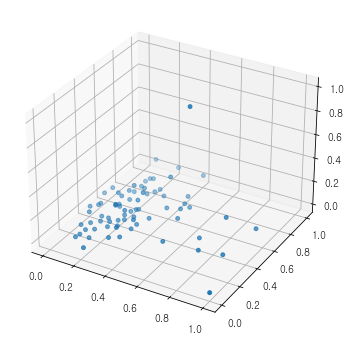

In [22]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

nol_df_ar = nol_df[['숙박시설','행정기관','문화시설_영화/공연/미술관박물관']].values

y,x = nol_df['청년인구'], nol_df_ar
print("x.shape: ", x.shape, ", y.shape: ", y.shape)

#3차원 그래프로 표현
xs = x[:,0] #숙박시설
ys = x[:,1] #행정기관
zx = x[:,2] #문화시설

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zx , marker='o', s=15, cmap='Greens')

#2차원 그래프
#plt.scatter(x[:, 1], x[:,2], marker = "o", s = 50)
#plt.grid()


plt.show()

C:\Users\csh51\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


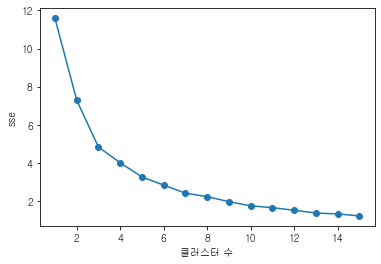

In [81]:
## 방법 elbow기법

from sklearn.cluster import KMeans
init_centroid = "random" # 초기 클러스터 중심을 임의적
#init_centroid = "k-means++" # 기본값

def elbow(x):
    sse = [] #오차제곱합이 최소가 되도록 클러스터의 중심을 결정
    for i in range(1, 16):
        km = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1, 16), sse, marker = "o")
    plt.xlabel("클러스터 수")
    plt.ylabel("sse")
    plt.show()
    
elbow(x)

## K-means

KMeans(init='random', n_clusters=3, random_state=0)
pred:  [2 2 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 2 1 1 1
 1 1 1 1 1 0 0 1 0 0 0 1 2 1 0 1 0 0 1 0 2 2 1 0 1 0 0 1 2 0 1 1 1 2 1 1 2
 0]


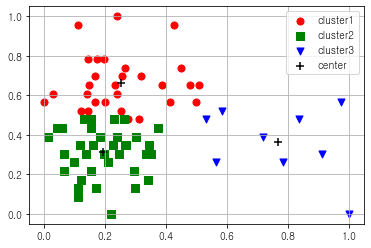

In [12]:
from sklearn.cluster import KMeans
init_centroid = "random" # 초기 클러스터 중심을 임의적
#init_centroid = "k-means++" # 기본값

kmodel = KMeans(n_clusters = 3, init = init_centroid, random_state = 0)
print(kmodel)
pred = kmodel.fit_predict(x)
print("pred: ", pred)
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], marker = "o", s = 50, c = "red", label = "cluster1")
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], marker = "s", s = 50, c = "green", label = "cluster2")
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], marker = "v", s = 50, c = "blue", label = "cluster3")

plt.scatter(kmodel.cluster_centers_[:,0], kmodel.cluster_centers_[:,1],
            marker = "+", s = 80, c = "black", label = "center")
plt.legend()
plt.grid()
plt.show()

## 밀도 기반 클러스터링

[[0.58227848 0.52173913 1.        ]
 [0.83544304 0.47826087 0.20765027]
 [0.27531646 0.47826087 0.1284153 ]
 [0.14240506 0.52173913 0.08196721]
 [0.15506329 0.43478261 0.06557377]
 [0.30063291 0.39130435 0.05464481]
 [0.2278481  0.47826087 0.01092896]
 [0.24050633 0.60869565 0.1284153 ]
 [0.26582278 0.34782609 0.04644809]
 [0.01265823 0.39130435 0.03005464]
 [0.02848101 0.60869565 0.04918033]
 [0.12974684 0.47826087 0.03005464]
 [0.1835443  0.39130435 0.1147541 ]
 [0.31012658 0.47826087 0.20765027]
 [0.         0.56521739 0.02185792]
 [0.23734177 1.         0.04371585]
 [0.26265823 0.47826087 0.04098361]
 [0.15189873 0.2173913  0.01092896]
 [0.5        0.56521739 0.08196721]
 [0.04113924 0.43478261 0.02459016]
 [0.25632911 0.69565217 0.04371585]
 [0.19936709 0.56521739 0.16666667]
 [0.38607595 0.65217391 0.25409836]
 [0.11075949 0.95652174 0.09836066]
 [0.16772152 0.56521739 0.03005464]
 [0.34177215 0.17391304 0.05464481]
 [0.16139241 0.34782609 0.01912568]
 [0.33544304 0.30434783 0.02

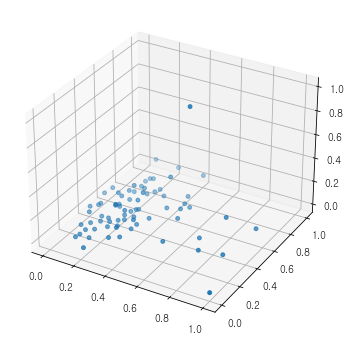

[1 1 0 0 0 0 0 2 0 0 2 0 0 0 0 2 0 0 2 0 2 2 2 2 2 0 0 0 0 2 0 0 0 1 0 0 0
 0 0 0 0 0 2 2 0 2 2 2 0 1 0 2 0 2 2 0 2 1 1 0 2 0 2 2 0 1 2 0 0 0 1 0 0 1
 2]


In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

y,x = nol_df['청년인구'], nol_df_ar
print(x, x.shape)
print(y, y.shape)

#3차원 그래프로 표현
xs = x[:,0]
ys = x[:,1]
zx = x[:,2]

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs,ys,zx , marker='o', s=15, cmap='Greens')

plt.show()

km = KMeans(n_clusters = 3, random_state = 0)
pred1 = km.fit_predict(x)
print(pred1)

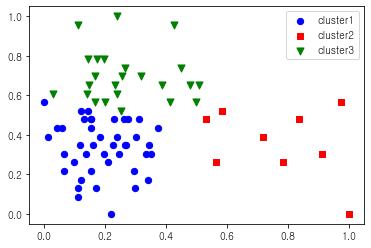

In [14]:
def plotPred1(x, y):
    plt.scatter(x[y==0, 0], x[y==0, 1], c="blue", 
                marker = "o", s = 40, label = "cluster1")
    plt.scatter(x[y==1, 0], x[y==1, 1], c="red", 
                marker = "s", s = 40, label = "cluster2")
    plt.scatter(x[y==2, 0], x[y==2, 1], c = "green", 
                marker = "v", s = 50, label = "cluster3")

    plt.legend()
    plt.show()
    
plotPred1(x, pred1)

## K-means 군집분석 청년인구 - 인프라

### 청년인구 - 숙박시설

KMeans(init='random', n_clusters=3, random_state=0)
pred:  [1 1 0 2 2 2 2 2 0 0 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 1 0 0 0
 0 0 0 0 0 2 0 0 2 2 2 0 1 0 2 0 2 2 0 2 1 1 0 2 0 2 2 0 1 2 0 0 0 1 0 0 1
 2]


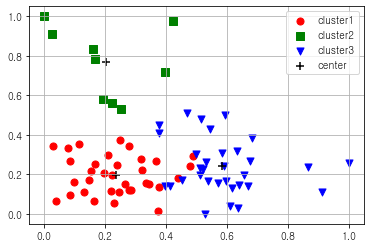

In [80]:
#x[0] : 청년인구
#x[1] : 숙박시설
#x[2] : 행정기관
#x[3] : 문화시설

x = nol_df[['청년인구','숙박시설','행정기관','문화시설_영화/공연/미술관박물관']].values

from sklearn.cluster import KMeans
init_centroid = "random" # 초기 클러스터 중심을 임의적
#init_centroid = "k-means++" # 기본값

kmodel = KMeans(n_clusters = 3, init = init_centroid, random_state = 0)
print(kmodel)
pred = kmodel.fit_predict(x)
print("pred: ", pred)
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], marker = "o", s = 50, c = "red", label = "cluster1")
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], marker = "s", s = 50, c = "green", label = "cluster2")
plt.scatter(x[pred == 2, 0], x[pred == 2, 1], marker = "v", s = 50, c = "blue", label = "cluster3")

plt.scatter(kmodel.cluster_centers_[:,0], kmodel.cluster_centers_[:,1],
            marker = "+", s = 80, c = "black", label = "center")
plt.legend()
plt.grid()
plt.show()

### 청년인구 - 행정기관

KMeans(init='random', n_clusters=3, random_state=0)
pred:  [1 1 0 2 2 2 2 2 0 0 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 1 0 0 0
 0 0 0 0 0 2 0 0 2 2 2 0 1 0 2 0 2 2 0 2 1 1 0 2 0 2 2 0 1 2 0 0 0 1 0 0 1
 2]


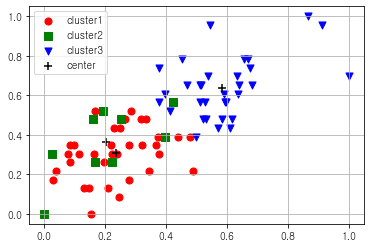

In [47]:
kmodel = KMeans(n_clusters = 3, init = init_centroid, random_state = 0)
print(kmodel)
pred = kmodel.fit_predict(x)
print("pred: ", pred)
plt.scatter(x[pred == 0, 0], x[pred == 0, 2], marker = "o", s = 50, c = "red", label = "cluster1")
plt.scatter(x[pred == 1, 0], x[pred == 1, 2], marker = "s", s = 50, c = "green", label = "cluster2")
plt.scatter(x[pred == 2, 0], x[pred == 2, 2], marker = "v", s = 50, c = "blue", label = "cluster3")

plt.scatter(kmodel.cluster_centers_[:,0], kmodel.cluster_centers_[:,2],
            marker = "+", s = 80, c = "black", label = "center")
plt.legend()
plt.grid()
plt.show()

### 청년인구 - 문화시설

KMeans(init='random', n_clusters=3, random_state=0)
pred:  [1 1 0 2 2 2 2 2 0 0 2 2 0 2 2 2 2 0 2 2 2 2 2 2 2 0 0 0 0 2 0 0 0 1 0 0 0
 0 0 0 0 0 2 0 0 2 2 2 0 1 0 2 0 2 2 0 2 1 1 0 2 0 2 2 0 1 2 0 0 0 1 0 0 1
 2]


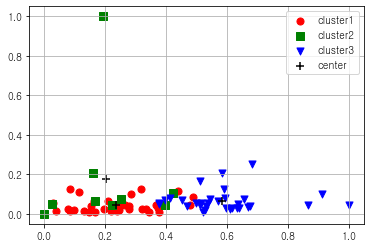

In [49]:
kmodel = KMeans(n_clusters = 3, init = init_centroid, random_state = 0)
print(kmodel)
pred = kmodel.fit_predict(x)
print("pred: ", pred)
plt.scatter(x[pred == 0, 0], x[pred == 0, 3], marker = "o", s = 50, c = "red", label = "cluster1")
plt.scatter(x[pred == 1, 0], x[pred == 1, 3], marker = "s", s = 50, c = "green", label = "cluster2")
plt.scatter(x[pred == 2, 0], x[pred == 2, 3], marker = "v", s = 50, c = "blue", label = "cluster3")

plt.scatter(kmodel.cluster_centers_[:,0], kmodel.cluster_centers_[:,3],
            marker = "+", s = 80, c = "black", label = "center")
plt.legend()
plt.grid()
plt.show()

In [51]:
kmodel.cluster_centers_ #청년인구, 숙박시설, 행정기관, 문화시설의 중심값

array([[0.23687033, 0.19769173, 0.30690537, 0.04379621],
       [0.20432742, 0.76687764, 0.36231884, 0.17729205],
       [0.58480581, 0.2421875 , 0.63858696, 0.0673668 ]])

In [57]:
center = pd.DataFrame(kmodel.cluster_centers_,
                     index = ['군집1','군집2','군집3'])
center.columns =['청년인구','숙박시설','행정기관','문화시설']
center

,청년인구,숙박시설,행정기관,문화시설
군집1,0.236870,0.197692,0.306905,0.043796
군집2,0.204327,0.766878,0.362319,0.177292
군집3,0.584806,0.242188,0.638587,0.067367
